# **Import Library**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import plotly.express as px

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


In [3]:
# Mengubah parameter default matplotlib

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

# **Import Dataset**

In [2]:
# load data
df = pd.read_csv('Train.csv')

# Rename kolom 
df = df.rename(columns={'Warehouse_block':'Warehouse',
                        'Mode_of_Shipment':'Shipment',
                        'Customer_care_calls':'Calls',
                        'Customer_rating':'Rating',
                        'Cost_of_the_Product':'Cost',
                        'Prior_purchases':'Purchases',
                        'Product_importance':'Importance',
                        'Discount_offered':'Discount',
                        'Weight_in_gms':'Weight (gram)',
                        'Reached.on.Time_Y.N':'Late'})

In [3]:
df.to_csv('Data Raw.csv', index=False)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             10999 non-null  int64 
 1   Warehouse      10999 non-null  object
 2   Shipment       10999 non-null  object
 3   Calls          10999 non-null  int64 
 4   Rating         10999 non-null  int64 
 5   Cost           10999 non-null  int64 
 6   Purchases      10999 non-null  int64 
 7   Importance     10999 non-null  object
 8   Gender         10999 non-null  object
 9   Discount       10999 non-null  int64 
 10  Weight (gram)  10999 non-null  int64 
 11  Late           10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [186]:
#pengelompokkan jenis feature
cat = ['Warehouse', 'Shipment', 'Importance', 'Gender'] 
num = ['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)', 'Late'] 

In [16]:
df.sample(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late
4434,4435,D,Ship,3,3,171,4,low,M,8,4502,0
10120,10121,C,Road,5,4,179,6,medium,M,1,5433,0
10713,10714,B,Ship,5,5,221,5,low,F,8,1123,1
2034,2035,D,Road,3,5,243,2,medium,M,42,3421,1
8135,8136,F,Ship,6,2,213,2,medium,F,7,5415,0


In [34]:
# Summary feature numerical
df[num].describe()

,Calls,Rating,Cost,Purchases,Discount,Weight (gram),Late
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Beberapa pengamatan:

1. Kolom `Calls`, `Rating`, `Cost`, dan `Weight (gram)` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `Purchase` dan `Discount` tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi log nantinya
3. Kolom `Late` atau target bernilai boolean/binary

In [35]:
# Summary feature categorical
df[cat].describe()

,Warehouse,Shipment,Importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


# **Stage 2**

## **1. Data Cleansing**


### A. Handle Missing Value and Duplicate Data

In [5]:
df.isna().sum()

ID               0
Warehouse        0
Shipment         0
Calls            0
Rating           0
Cost             0
Purchases        0
Importance       0
Gender           0
Discount         0
Weight (gram)    0
Late             0
dtype: int64

**Pengamatan: Tidak ada missing value pada data**

### B. Handle Duplicated Data

In [6]:
# cek baris yang duplikat
print(f'Jumlah row duplicated = {df.duplicated().sum()}')

Jumlah row duplicated = 0


**Tidak ada data duplikat pada dataset**

### C. Handle Outliers

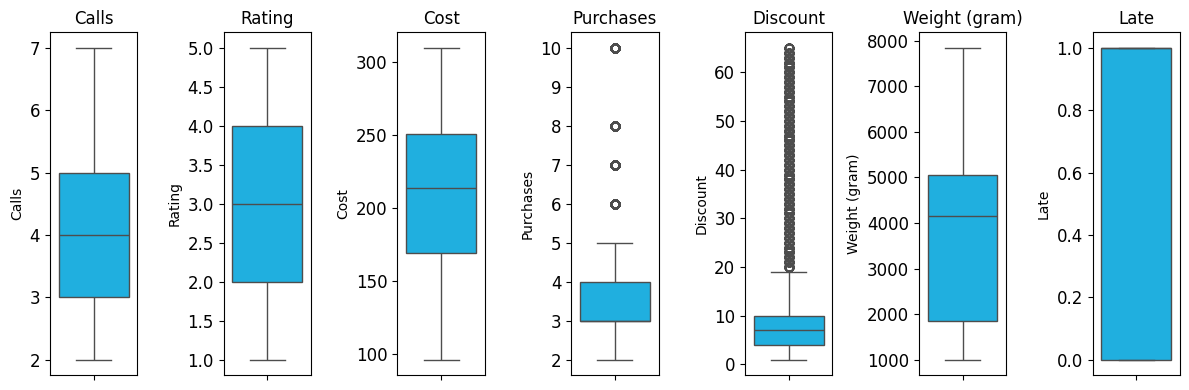

In [188]:
# cek boxplot kolom tipe data int/float untuk melihat outlier

for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color='deepskyblue', orient='v')
    plt.title(num[i])
    plt.tight_layout()

In [36]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[num]))
outliers = z_scores > 3

# Cek keadaan data setelah outlier dihilangkan
cleaned_df = df[~outliers.any(axis=1)]

# Menampilkan hasil
print("Jumlah outlier:")
print(outliers.sum())

print(f'\nJumlah baris sebelum memfilter outlier: {len(df)}')
print(f'Jumlah baris setelah memfilter outlier: {len(cleaned_df)}')

Jumlah outlier:
Calls              0
Rating             0
Cost               0
Purchases        178
Discount         181
Weight (gram)      0
Late               0
dtype: int64

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10642


In [15]:
# Distribusi "Yes" dan "No" pada kolom "Late" di df
df_distribution = df['Late'].value_counts(normalize=True)

# Distribusi "Yes" dan "No" pada kolom "Late" di cleaned_df
cleaned_df_distribution = cleaned_df['Late'].value_counts(normalize=True)

print("Distribusi 'Yes' dan 'No' pada kolom 'Late' di df:")
print(df_distribution)

print("\nDistribusi 'Yes' dan 'No' pada kolom 'Late' di cleaned_df:")
print(cleaned_df_distribution)


Distribusi 'Yes' dan 'No' pada kolom 'Late' di df:
Late
1    0.596691
0    0.403309
Name: proportion, dtype: float64

Distribusi 'Yes' dan 'No' pada kolom 'Late' di cleaned_df:
Late
1    0.590303
0    0.409697
Name: proportion, dtype: float64


- Persentase distribusi ini masih aman, sehingga dapat dipertimbangkan untuk mempertahankan outlier dan menggunakan robust scale

Kita akan menggunakan Z-score filtering (cenderung lebih konservatif)

### D. Feature Transformation


__*Log Tranformation*__

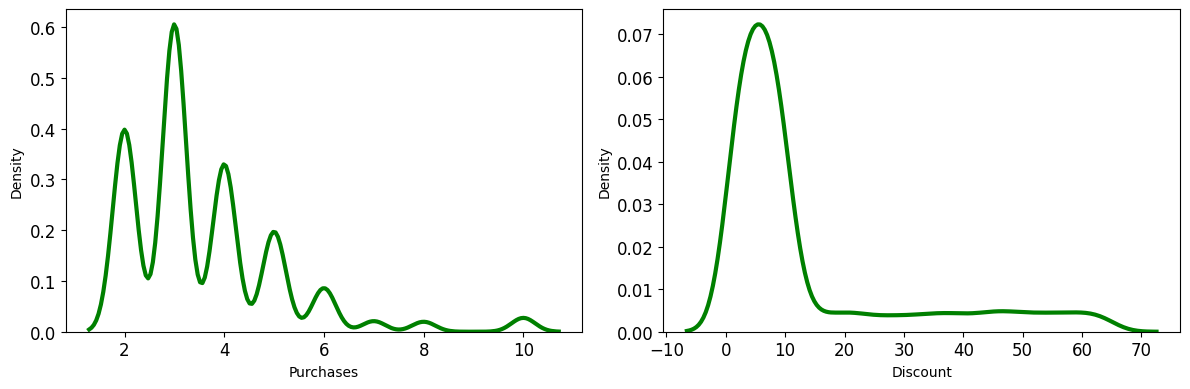

In [50]:
# cek distribusi kolom Purchase dan Discount

log_trans = ['Purchases', 'Discount']

for i in range(0, len(log_trans)):
    plt.subplot(1, len(log_trans), i+1)
    sns.kdeplot(x=df[log_trans[i]], color='green')
    plt.tight_layout()

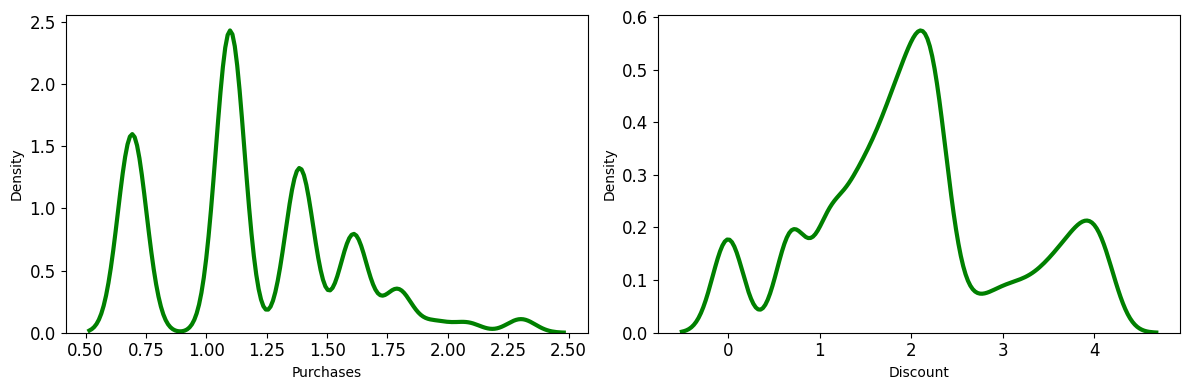

In [51]:
# distribusi purchases dan discount (setelah log transformation)
for i in range(0, len(log_trans)):
    plt.subplot(1, len(log_trans), i+1)
    sns.kdeplot(np.log(df[log_trans[i]]), color='green')
    plt.tight_layout()
    
# lebih mendekati distribusi normal!

In [108]:
# skewness sebelum transformasi
skewness_before = df[num].skew()
print("Skewness sebelum transformasi:")
print(skewness_before)

log_df = df.copy()

# log transformation pada fitur numerik
log_df[num] = log_df[num].apply(lambda x: np.log(x + 1))

# skewness setelah transformasi
skewness_after = log_df[num].skew()
print("\nSkewness setelah transformasi:")
print(skewness_after)

# Menghitung pengurangannya
skewness_reduction = skewness_before - skewness_after
print("\nPengurangan skewness:")
print(skewness_reduction)

Skewness sebelum transformasi:
Calls            0.391926
Rating           0.004360
Cost            -0.157117
Purchases        1.681897
Discount         1.798929
Weight (gram)   -0.249747
Late            -0.394257
dtype: float64

Skewness setelah transformasi:
Calls           -0.132074
Rating          -0.401241
Cost            -0.552816
Purchases        0.666819
Discount         0.532220
Weight (gram)   -0.630281
Late            -0.394257
dtype: float64

Pengurangan skewness:
Calls            5.240000e-01
Rating           4.056005e-01
Cost             3.956991e-01
Purchases        1.015078e+00
Discount         1.266709e+00
Weight (gram)    3.805343e-01
Late            -1.110223e-16
dtype: float64


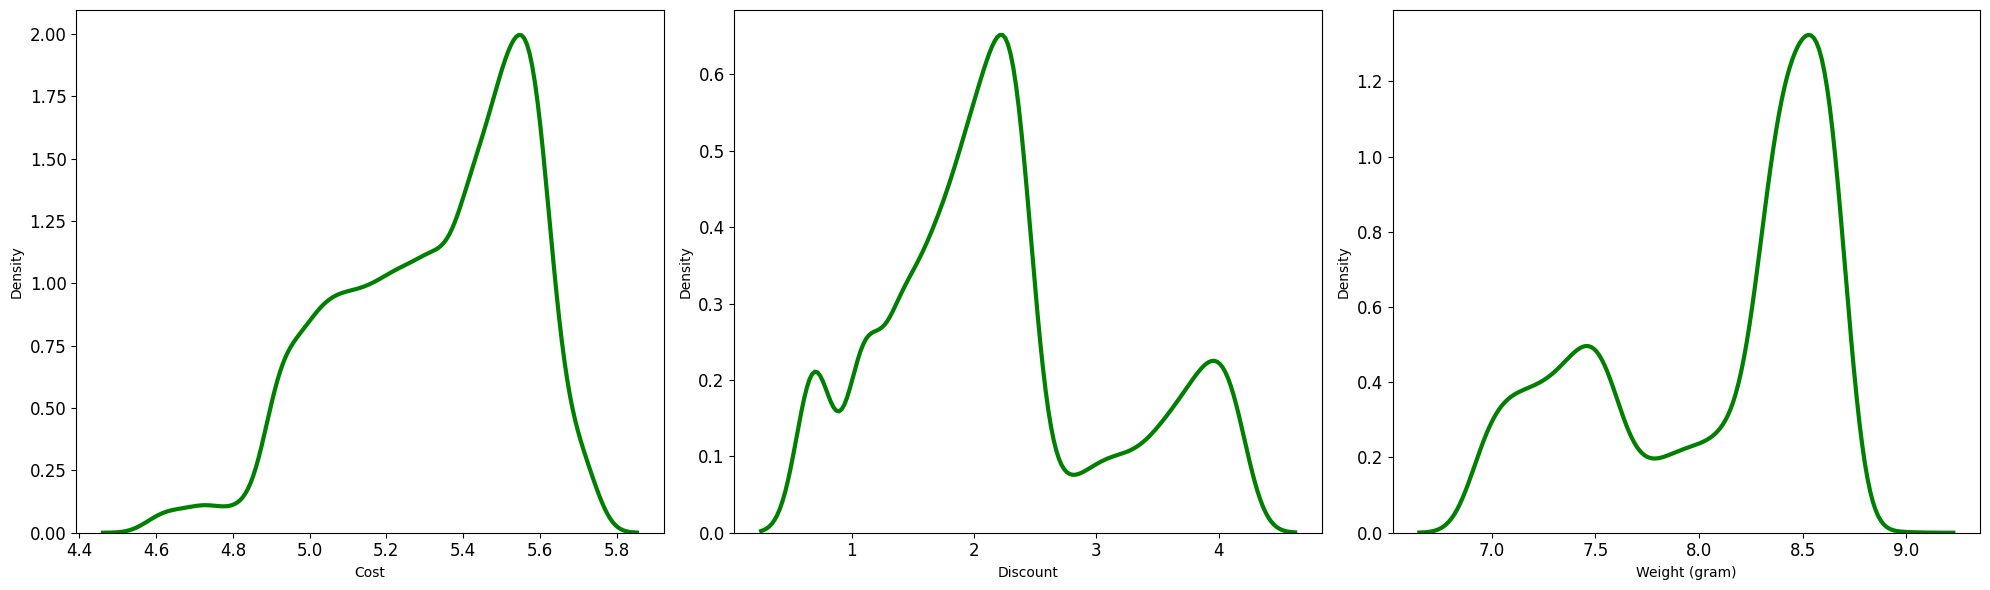

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns


num_log = ['Cost', 'Discount', 'Weight (gram)']

# Menampilkan distribusi setelah log transformation untuk semua fitur numerik
plt.figure(figsize=(20, 6))
for i in range(0, len(num_log)):
    plt.subplot(1, len(num_log), i+1)
    sns.kdeplot(x=log_df[num_log[i]], color='green')
    plt.tight_layout()

plt.show()


__*Normalisasi*__

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

norm_df = df.copy()

# Min-Max Scaling
scaler = MinMaxScaler()
norm_df[num] = scaler.fit_transform(df[num])

# Menampilkan skewness sebelum transformasi
skewness_before_norm = df[num].skew()
print("\nSkewness sebelum normalisasi:")
print(skewness_before_norm)

# Periksa skewness setelah normalisasi
skewness_after_norm = norm_df[num].skew()
print("\nSkewness setelah normalisasi:")
print(skewness_after_norm)

# Menghitung pengurangannya
skewness_reduction_norm = skewness_before_norm - skewness_after_norm
print("\nPengurangan skewness setelah normalisasi:")
print(skewness_reduction_norm)



Skewness sebelum normalisasi:
Calls            0.391926
Rating           0.004360
Cost            -0.157117
Purchases        1.681897
Discount         1.798929
Weight (gram)   -0.249747
Late            -0.394257
dtype: float64

Skewness setelah normalisasi:
Calls            0.391926
Rating           0.004360
Cost            -0.157117
Purchases        1.681897
Discount         1.798929
Weight (gram)   -0.249747
Late            -0.394257
dtype: float64

Pengurangan skewness setelah normalisasi:
Calls            1.831868e-15
Rating          -6.670012e-16
Cost            -4.440892e-16
Purchases        0.000000e+00
Discount         0.000000e+00
Weight (gram)   -3.885781e-16
Late             0.000000e+00
dtype: float64


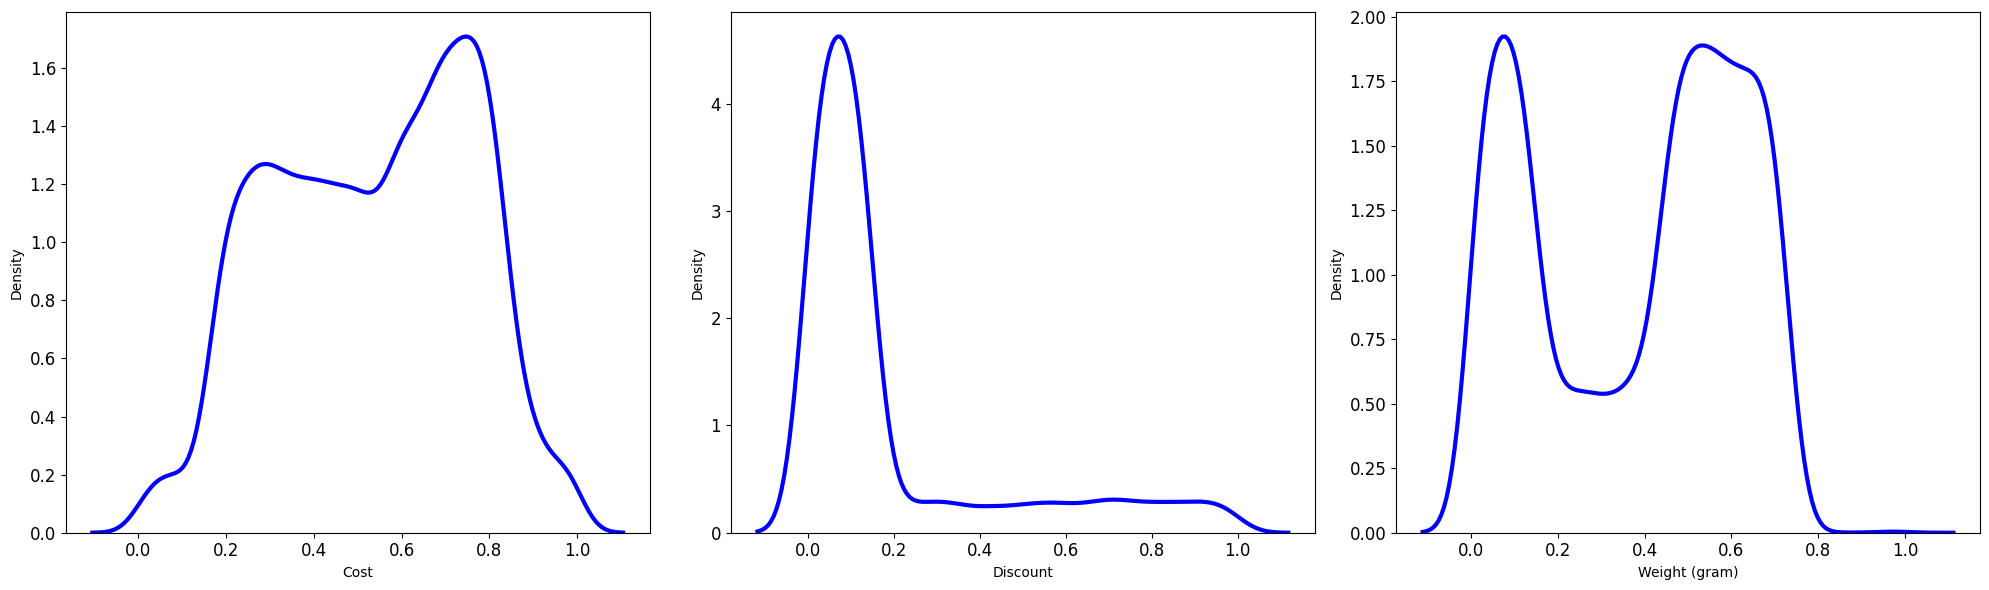

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

num_norm = ['Cost', 'Discount', 'Weight (gram)']

# Menampilkan distribusi setelah normalisasi untuk semua fitur numerik
plt.figure(figsize=(20, 6))
for i in range(0, len(num_norm)):
    plt.subplot(1, len(num_norm), i+1)
    sns.kdeplot(x=norm_df[num_norm[i]], color='blue')
    plt.tight_layout()

plt.show()


__*Standarisasi*__

In [40]:
from sklearn.preprocessing import StandardScaler

# Membuat dataset baru untuk normalisasi
standar_df = df.copy()

# Z-score Standardization
scaler = StandardScaler()
standar_df[num] = scaler.fit_transform(df[num])

# Menampilkan skewness
skewness_before_standar = df[num].skew()
print("\nSkewness sebelum standarisasi:")
print(skewness_before_standar)

# Periksa skewness
skewness_after_standar = standar_df[num].skew()
print("\nSkewness setelah standarisasi:")
print(skewness_after_standar)

# Menghitung pengurangannya
skewness_reduction_standar = skewness_before_standar - skewness_after_standar
print("\nPengurangan skewness setelah standar:")
print(skewness_reduction_standar)



Skewness sebelum standarisasi:
Calls            0.391926
Rating           0.004360
Cost            -0.157117
Purchases        1.681897
Discount         1.798929
Weight (gram)   -0.249747
Late            -0.394257
dtype: float64

Skewness setelah standarisasi:
Calls            0.391926
Rating           0.004360
Cost            -0.157117
Purchases        1.681897
Discount         1.798929
Weight (gram)   -0.249747
Late            -0.394257
dtype: float64

Pengurangan skewness setelah standar:
Calls            8.881784e-16
Rating          -4.250073e-17
Cost            -4.996004e-16
Purchases       -6.661338e-16
Discount        -4.440892e-16
Weight (gram)   -6.661338e-16
Late            -2.220446e-16
dtype: float64


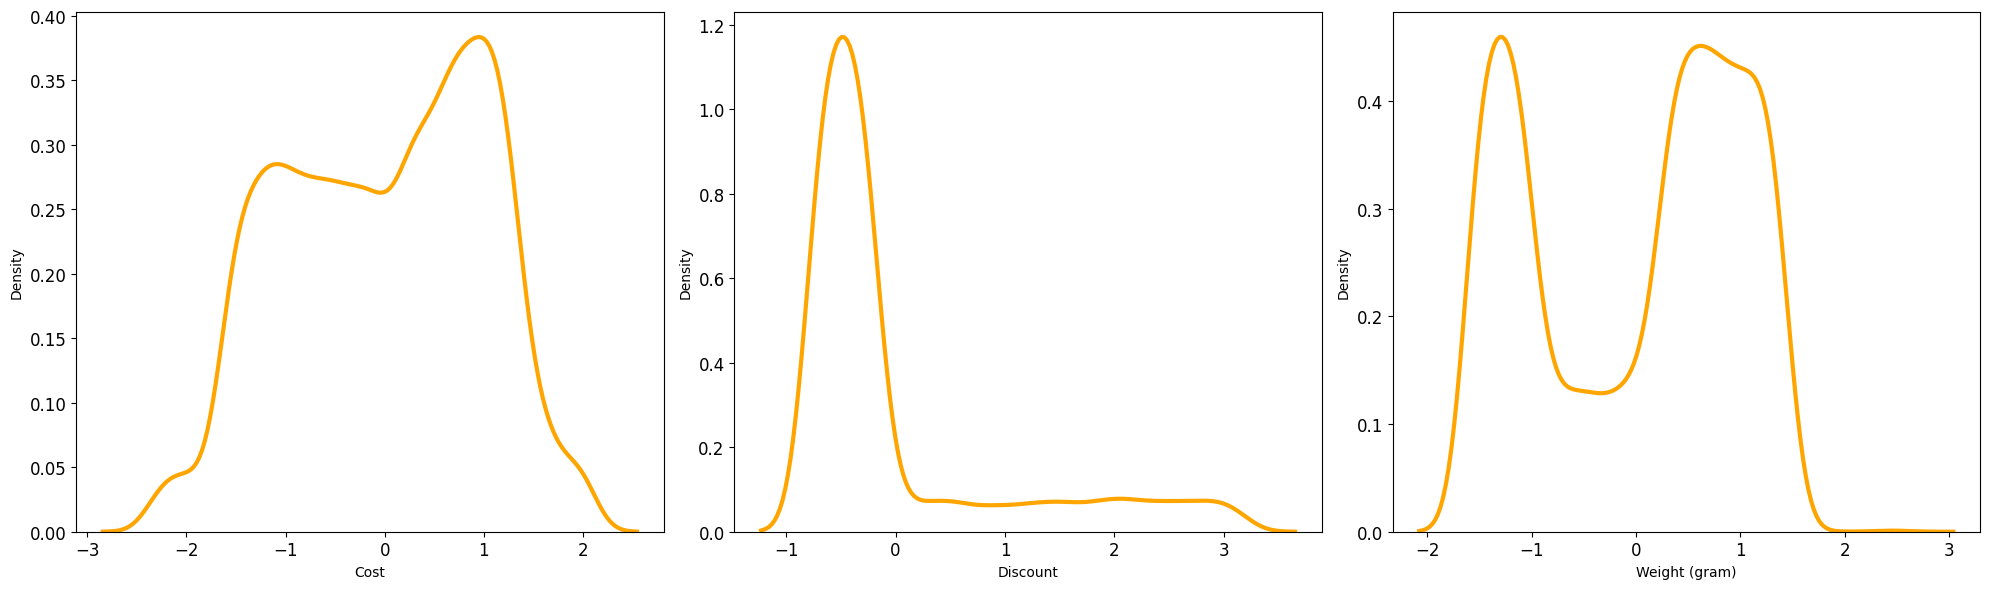

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

num_standar = ['Cost', 'Discount', 'Weight (gram)']

# Menampilkan distribusi setelah standarisasi untuk semua fitur numerik
plt.figure(figsize=(20, 6))
for i in range(0, len(num_standar)):
    plt.subplot(1, len(num_standar), i+1)
    sns.kdeplot(x=standar_df[num_standar[i]], color='orange')
    plt.tight_layout()

plt.show()


__*Robust Scale*__

In [145]:
from sklearn.preprocessing import RobustScaler

# Membuat dataset baru untuk normalisasi
robust_df = df.copy()

# Robust Scaling
scaler = RobustScaler()
robust_df[num] = scaler.fit_transform(df[num])

# Menampilkan skewness
skewness_before_robust = df[num].skew()
print("\nSkewness sebelum Robust Scaling:")
print(skewness_before_robust)

# Periksa skewness
skewness_after_robust = robust_df[num].skew()
print("\nSkewness setelah Robust Scaling:")
print(skewness_after_robust)

# Menghitung pengurangannya
skewness_reduction_robust = skewness_before_robust - skewness_after_robust
print("\nPengurangan skewness setelah Robust Scaling:")
print(skewness_reduction_robust)



Skewness sebelum Robust Scaling:
Calls            0.391926
Rating           0.004360
Cost            -0.157117
Purchases        1.681897
Discount         1.798929
Weight (gram)   -0.249747
Late            -0.394257
dtype: float64

Skewness setelah Robust Scaling:
Calls            0.391926
Rating           0.004360
Cost            -0.157117
Purchases        1.681897
Discount         1.798929
Weight (gram)   -0.249747
Late            -0.394257
dtype: float64

Pengurangan skewness setelah Robust Scaling:
Calls            3.330669e-16
Rating          -2.550044e-16
Cost            -6.383782e-16
Purchases        0.000000e+00
Discount        -4.440892e-16
Weight (gram)   -3.885781e-16
Late            -4.440892e-16
dtype: float64


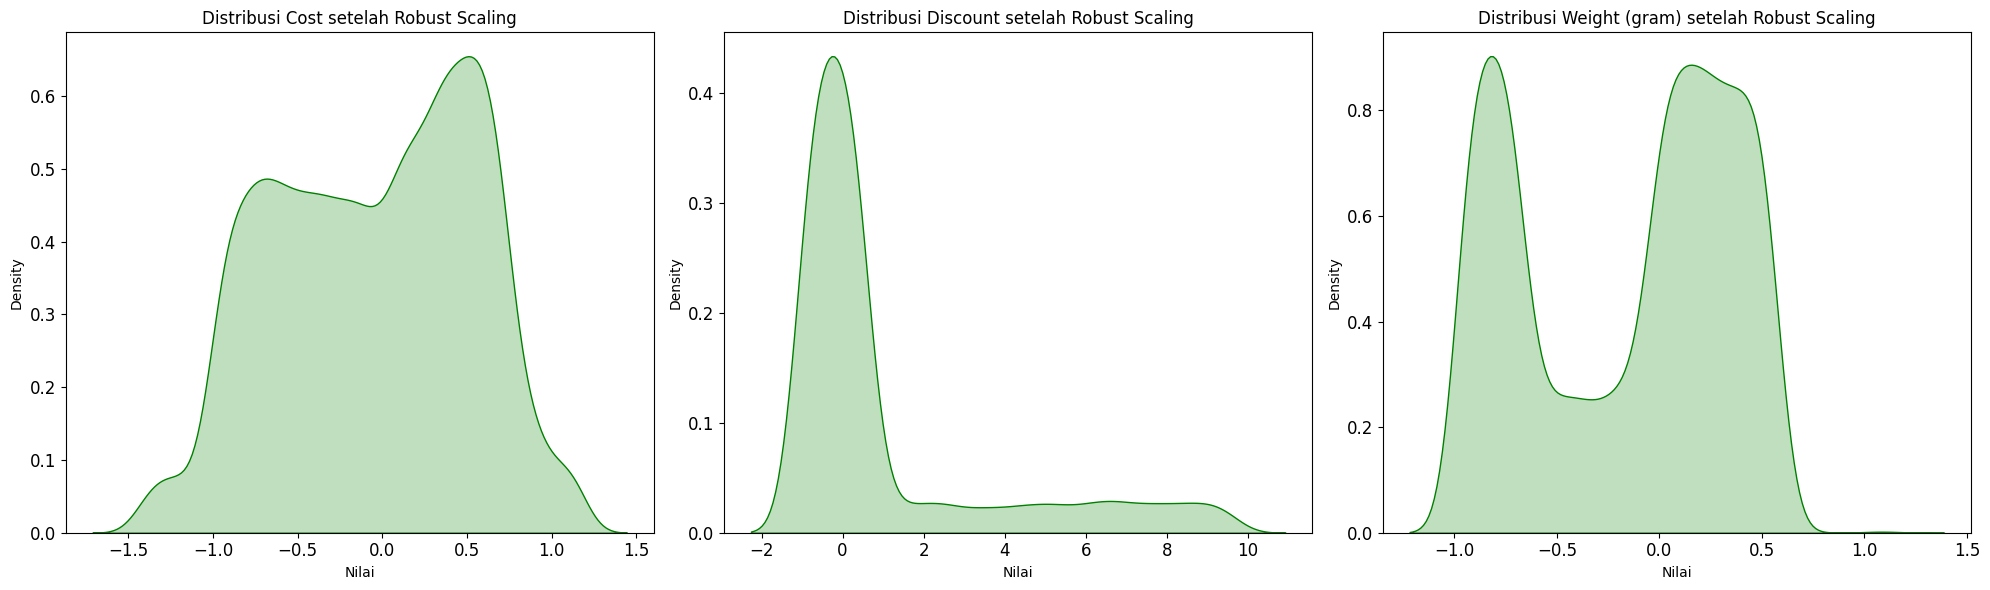

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

num_robust = ['Cost', 'Discount', 'Weight (gram)']

plt.figure(figsize=(20, 6))
for i in range(0, len(num_robust)):
    plt.subplot(1, len(num_robust), i+1)
    sns.kdeplot(data=robust_df[num_robust[i]], color='green', shade=True)
    plt.title(f'Distribusi {num_robust[i]} setelah Robust Scaling')
    plt.xlabel('Nilai')
    plt.ylabel('Density')
    plt.tight_layout()

plt.show()


- Beberapa fitur diuji coba ditransformasi untuk memudahkan pemodelan dan juga membuat fitur mendekati distribusi normal. Dari ketiga transformasi tersebut, Normalisasi memiliki pengurangan skewness terbesar pada fitur `Calls` dan `Rating`, sedangkan Log Transformation memiliki pengurangan skewness terbesar pada fitur `Purchases` dan `Discount`
- Robust Scaling memberikan hasil yang lebih baik daripada Normalisasi atau Standard Scaling dalam mengurangi skewness pada fitur-fitur yang sensitif terhadap outlier seperti `Purchase` dan `Discount`. Sehingga dengan mempertimbangkan percobaan penghilangan outlier pada sebelumnya dan menilai distribusi yes dan no pada `Late` masih proporsional, sehingga robust scaling dipilih untuk fitur transformasi

### E. Feature Encoding

In [59]:
#melihat feature kategorikal
for col in cat:
  print(f'value counts of column {col}')
  print(df[col].value_counts())
  print('---'*10, '\n')

value counts of column Warehouse
Warehouse
F    3539
B    1778
D    1777
A    1777
C    1771
Name: count, dtype: int64
------------------------------ 

value counts of column Shipment
Shipment
Ship      7211
Flight    1728
Road      1703
Name: count, dtype: int64
------------------------------ 

value counts of column Importance
Importance
low       5173
medium    4587
high       882
Name: count, dtype: int64
------------------------------ 

value counts of column Gender
Gender
F    5356
M    5286
Name: count, dtype: int64
------------------------------ 



Strategi encoding<br>
- `importance` : label encoding (kategori ordinal)
- `shipment` & `warehouse` : Berpotensi untuk One Hot Encoding (kategori bukan ordinal)

In [148]:
mapping_Importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

# replace kolom gender yang telah dikuantifikasi di dataset
robust_df['Importance'] = robust_df['Importance'].map(mapping_Importance)

In [61]:
# #shipment dan warehouse (one hot encoding), bila diperlukan pada saat proses ML
# for cat in ['Warehouse', 'Shipment']:
#     onehots = pd.get_dummies(df[cat], prefix=cat)
#     df = df.join(onehots)

In [137]:
robust_df.sample(5)

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late
10640,10641,A,Ship,-0.5,1.0,-0.548780,0.0,0,1,-1.000000,0.151690,0.0
1888,1889,C,Ship,-0.5,-0.5,-0.548780,7.0,1,0,-0.500000,-0.773711,0.0
2588,2589,A,Road,-0.5,-1.0,-0.207317,-1.0,0,1,-0.500000,-0.164460,0.0
5050,5051,C,Road,0.0,0.0,-0.268293,0.0,0,0,0.500000,-0.025230,-1.0
10541,10542,F,Road,0.5,0.5,0.170732,1.0,0,0,0.166667,0.212428,0.0


### F. Handle Class Imbalance

In [190]:
#cek ratio jumlah nilai target

df_late = df.groupby('Late').agg({'ID':'count'}).reset_index().rename(columns={'ID':'Jumlah'})
df_late['Ratio'] = df_late['Jumlah']*100/df_late['Jumlah'].sum()
df_late

,Late,Jumlah,Ratio
0,0,4436,40.330939
1,1,6563,59.669061


Tidak perlu dilakukan karena proportion of minority class > 40%

## **2. Feature Engineering**

### **A. Feature Selection**

In [151]:
robust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             10999 non-null  int64  
 1   Warehouse      10999 non-null  object 
 2   Shipment       10999 non-null  object 
 3   Calls          10999 non-null  float64
 4   Rating         10999 non-null  float64
 5   Cost           10999 non-null  float64
 6   Purchases      10999 non-null  float64
 7   Importance     10999 non-null  int64  
 8   Gender         10999 non-null  object 
 9   Discount       10999 non-null  float64
 10  Weight (gram)  10999 non-null  float64
 11  Late           10999 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 1.0+ MB


In [149]:
#melihat kolom int/float/bool

num_dtypes = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'bool']

num_df = robust_df.select_dtypes(include = num_dtypes)
numericals = num_df.columns

print(numericals)

Index(['ID', 'Calls', 'Rating', 'Cost', 'Purchases', 'Importance', 'Discount',
       'Weight (gram)', 'Late'],
      dtype='object')


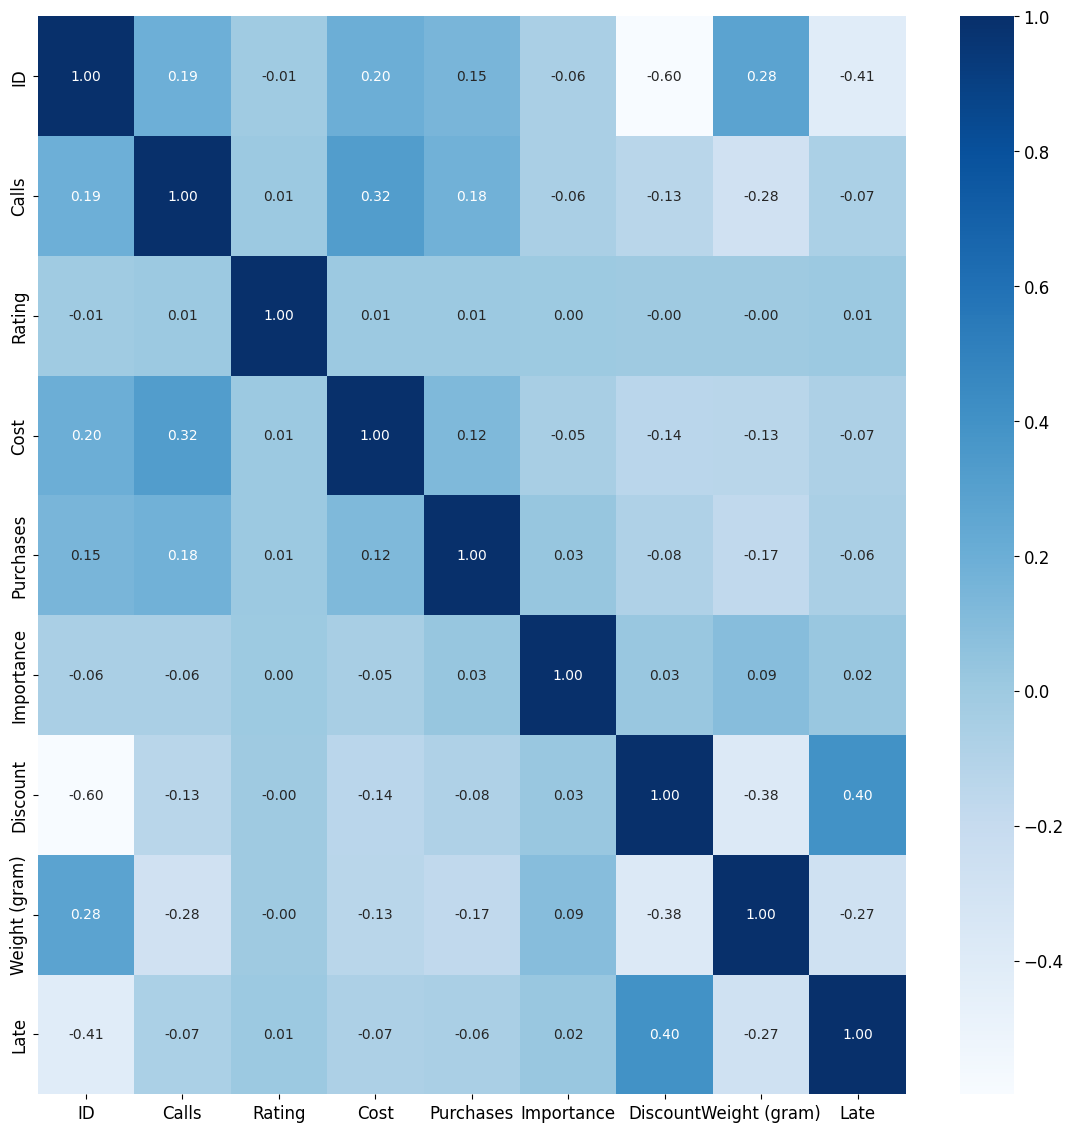

In [150]:
plt.figure(figsize=(14, 14))
sns.heatmap(robust_df[numericals].corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

Analisis Heatmap plot: <br>
- Menghapus feature `ID`, `gender`, dan `rating` dikarenakan feature tersebut tidak memiliki arti penting untuk kegunaan proses modelling.
- Dari heatmap plot, tidak ada feature yang perlu dihapus karena tidak ada feature yang redundant dengan nilai korelasi antar feature > 0.7.

In [152]:
robust_df = robust_df.drop(['ID', 'Rating', 'Gender'], axis=1)

In [153]:
robust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Warehouse      10999 non-null  object 
 1   Shipment       10999 non-null  object 
 2   Calls          10999 non-null  float64
 3   Cost           10999 non-null  float64
 4   Purchases      10999 non-null  float64
 5   Importance     10999 non-null  int64  
 6   Discount       10999 non-null  float64
 7   Weight (gram)  10999 non-null  float64
 8   Late           10999 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 773.5+ KB


In [68]:
# #ubah boolean menjadi int (proses one hot, apabila diperlukan)

# boolean = ['Warehouse_A','Warehouse_B','Warehouse_C','Warehouse_D','Warehouse_F','Shipment_Flight','Shipment_Road','Shipment_Ship']

# df[boolean] = df[boolean].astype(int)

### **B. Feature Extraction**

In [154]:
robust_df.sample(6)

,Warehouse,Shipment,Calls,Cost,Purchases,Importance,Discount,Weight (gram),Late
7851,B,Ship,0.0,-0.829268,0.0,0,-0.666667,0.335150,0.0
8939,F,Ship,0.0,-0.073171,0.0,1,0.000000,0.117116,0.0
6743,F,Ship,1.0,-0.597561,2.0,1,-0.333333,0.224887,-1.0
8021,F,Ship,0.5,0.536585,2.0,0,-0.500000,-0.970877,-1.0
328,C,Ship,0.5,0.731707,-1.0,1,2.833333,-0.537611,0.0
2214,D,Ship,0.0,-0.390244,-1.0,1,7.833333,-0.276592,0.0


In [155]:
# Menghitung kuartil pertama (Q1), kedua (Q2), dan ketiga (Q3) dari kolom 'Weight (gram)'
Q1 = robust_df['Weight (gram)'].quantile(0.25)
Q2 = robust_df['Weight (gram)'].quantile(0.50)
Q3 = robust_df['Weight (gram)'].quantile(0.75)

# Membuat kolom baru 'Weight_category' berdasarkan kategori berat
robust_df['Weight_category'] = pd.cut(robust_df['Weight (gram)'], bins=[-float('inf'), Q1, Q2, Q3, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

# Melakukan label encoding manual pada kolom 'Weight_category'
label_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
robust_df['Weight_category_encoded'] = robust_df['Weight_category'].map(label_mapping)

robust_df[['Weight (gram)', 'Weight_category', 'Weight_category_encoded']].sample(10)


,Weight (gram),Weight_category,Weight_category_encoded
609,-0.911073,Low,1
2047,-0.612989,Medium,2
1915,-0.883974,Low,1
7834,0.223953,High,3
8387,0.108706,High,3
7309,0.021803,High,3
9840,0.556300,Very High,4
8588,0.450086,Very High,4
5763,-0.710793,Medium,2
10207,-0.707989,Medium,2


- Ekstrasi fitur `Weight_category` beserta encodingnya
- Kemudian bisa di drop kolom `Weight_category` karena sudah encode

In [156]:
# Menghapus kolom 'Weight_category' yang tidak diperlukan lagi
robust_df = robust_df.drop('Weight_category', axis=1)

In [157]:

robust_df.sample(5)

,Warehouse,Shipment,Calls,Cost,Purchases,Importance,Discount,Weight (gram),Late,Weight_category_encoded
3021,B,Flight,0.0,-0.573171,0.0,0,5.833333,-0.919483,0.0,1
825,B,Flight,0.0,-0.658537,0.0,0,4.333333,-0.720137,0.0,1
6764,A,Ship,1.0,-0.512195,3.0,1,0.500000,0.437627,0.0,4
6303,B,Flight,1.0,1.060976,1.0,0,-0.666667,-0.682448,-1.0,2
9727,F,Flight,0.5,-1.426829,0.0,1,0.166667,0.133313,-1.0,3


In [158]:
def categorize_purchases(Purchases):
    if Purchases >= 3:
        return 1
    else:
        return 0

robust_df['Reorder_purchases'] = df['Purchases'].apply(categorize_purchases) 
#pengambilan data reorder purchases diambil dari dataset df karena data purchase sudah terkena robust scaling

# Menampilkan kolom 'Purchases' dan 'Reorder_purchase'
print(robust_df[['Purchases', 'Reorder_purchases']])


       Purchases  Reorder_purchases
0            0.0                  1
1           -1.0                  0
2            1.0                  1
3            1.0                  1
4            0.0                  1
...          ...                ...
10994        2.0                  1
10995        2.0                  1
10996        2.0                  1
10997        3.0                  1
10998        2.0                  1

[10999 rows x 2 columns]


- Ekstrasi fitur `Reorder_purchases` dengan catatan prior purchases (yes/no), >= 3 : yes (1) dan < 3 : no (0)

### **C. Feature Tambahan**

- Tidak ada fitur tambahan

### **Robust Scaling Fitur Baru**

In [192]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

robust_df[['Weight_category_encoded', 'Reorder_purchases']] = scaler.fit_transform(robust_df[['Weight_category_encoded', 'Reorder_purchases']])

robust_df[['Weight_category_encoded', 'Reorder_purchases']]


,Weight_category_encoded,Reorder_purchases
0,-0.666667,0.0
1,0.000000,-1.0
2,0.000000,0.0
3,-0.666667,0.0
4,0.000000,0.0
...,...,...
10994,-0.666667,0.0
10995,-0.666667,0.0
10996,-0.666667,0.0
10997,-0.666667,0.0


### **Optimisasi**

In [195]:
# Drop kolom 'Warehouse' dan 'Shipment'
df_model = robust_df.drop(['Warehouse', 'Shipment'], axis=1)

In [196]:
# Export DataFrame ke dalam file CSV
df_model.to_csv('train_prototipe.csv', index=False)

- Drop Kolom `Warehouse` dan `Shipment` untuk menjadikannya dataset yang siap untuk dimasukan ke dalam model, export ke dalam csv 

In [198]:
df_model.sample(10)

,Calls,Cost,Purchases,Importance,Discount,Weight (gram),Late,Weight_category_encoded,Reorder_purchases
2393,0.0,-0.682927,0.0,0,1.833333,-0.969631,0.0,-0.666667,0.0
6774,-0.5,-0.780488,0.0,0,-0.833333,0.159165,0.0,0.666667,0.0
9361,0.5,0.097561,3.0,0,0.333333,-0.979910,-1.0,-0.666667,0.0
10817,0.0,0.109756,-1.0,0,-0.666667,0.503348,0.0,1.333333,-1.0
3506,0.0,-0.268293,0.0,1,0.500000,-0.019623,0.0,0.000000,0.0
1167,0.0,0.158537,-1.0,2,8.833333,-0.332970,0.0,0.000000,-1.0
1982,0.0,-0.975610,1.0,0,4.833333,-0.921352,0.0,-0.666667,0.0
3056,-0.5,-0.463415,0.0,0,-0.500000,-0.951254,0.0,-0.666667,0.0
4583,-1.0,-0.536585,0.0,2,0.000000,0.042050,0.0,0.666667,0.0
8185,-0.5,0.439024,-1.0,1,-0.500000,0.071951,-1.0,0.666667,-1.0


## *APPENDIX*
